In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import BSpline
from scipy.signal import savgol_filter

In [11]:
os.chdir('C:\\Projects\\ature\\net_logs')

In [12]:
train_val = pd.read_csv('chkDRIVEunet.tar-TRAIN.csv', index_col='TYPE')

val = train_val.query('TYPE==1')
T_val = np.arange(val.shape[0])

train = train_val.query('TYPE==0')
T_train =np.arange(train.shape[0])

test= pd.read_csv('chkDRIVEunet.tar-TEST.csv', index_col='TYPE')
T_test = np.arange(test.shape[0])

### Validation Precision-Recall

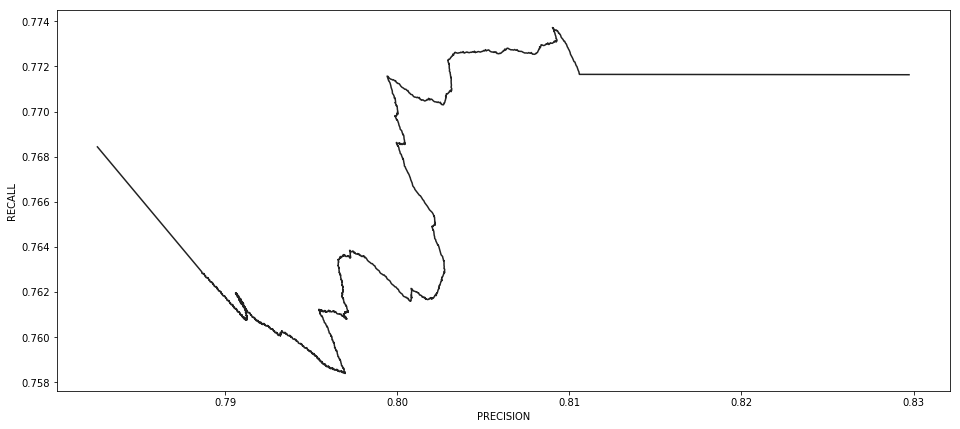

In [13]:
plt.rcParams["figure.figsize"] = [16,7]
prec_hat=savgol_filter(val['PRECISION'], 1111, 1)
rec_hat=savgol_filter(val['RECALL'], 1111, 1)
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.plot(prec_hat, rec_hat, color='#222222')
plt.show()

### Validation F1 Score

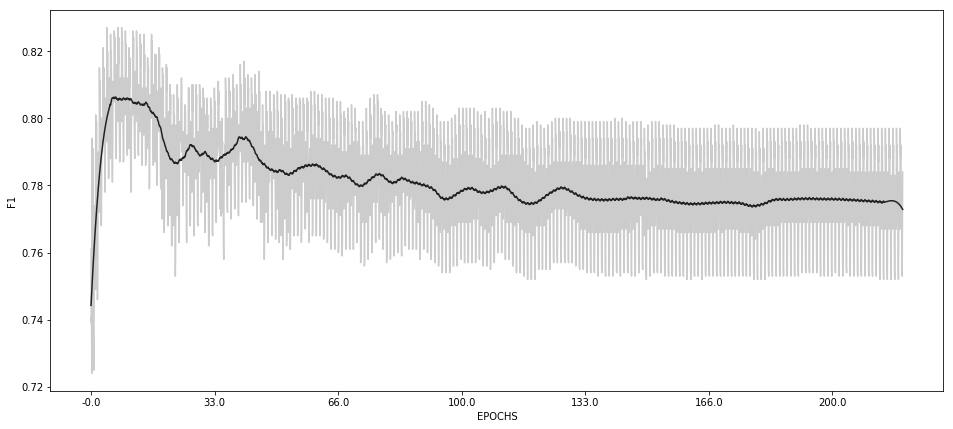

In [19]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(val['F1'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_val,val['F1'], color='#cccccc')
plt.plot(T_val,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//val.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('F1')
plt.show()

### Validation Accuracy

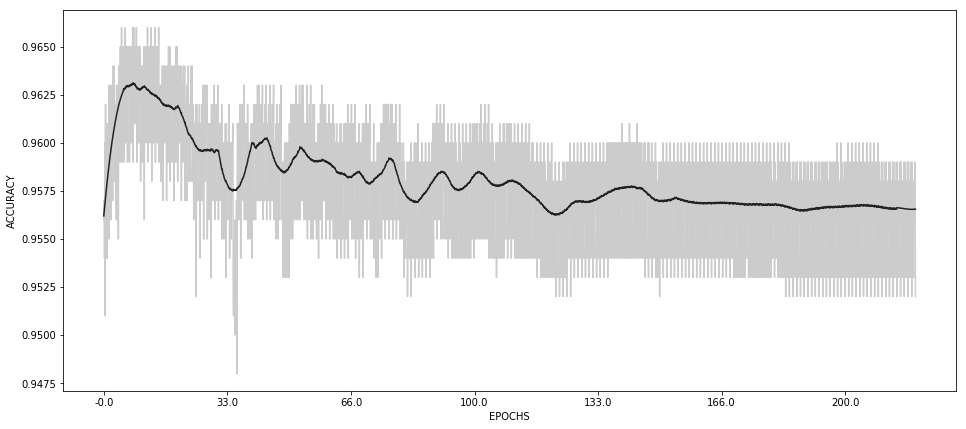

In [20]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(val['ACCURACY'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_val,val['ACCURACY'], color='#cccccc')
plt.plot(T_val,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//val.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.show()

### Training F1 Score

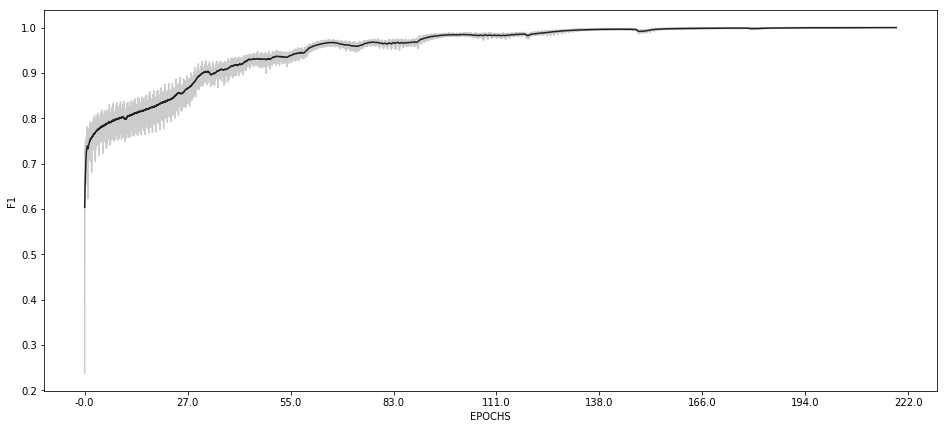

In [21]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(train['F1'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_train,train['F1'], color='#cccccc')
plt.plot(T_train,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//train.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('F1')
plt.show()

### Training precision-recall

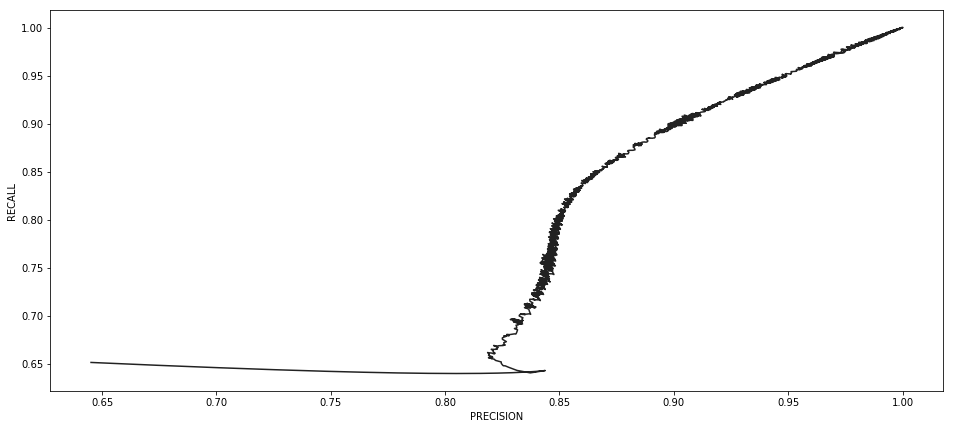

In [22]:
plt.rcParams["figure.figsize"] = [16,7]
prec_hat=savgol_filter(train['PRECISION'], 111, 2)
rec_hat=savgol_filter(train['RECALL'], 111, 2)
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.plot(prec_hat, rec_hat, color='#222222')
# plt.plot(T_val,rec_hat, color='Blue')
plt.show()

### Training loss

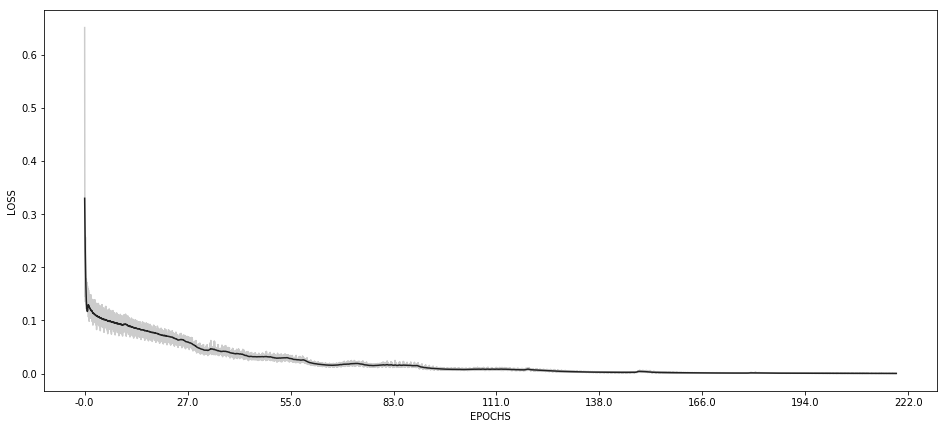

In [23]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(train['LOSS'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_train,train['LOSS'], color='#cccccc')
plt.plot(T_train,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//train.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.show()

### Training Accuracy

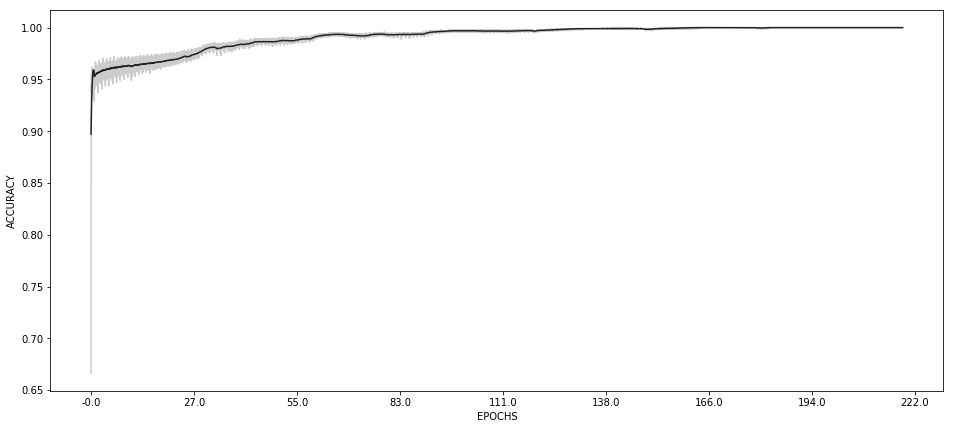

In [24]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(train['ACCURACY'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_train,train['ACCURACY'], color='#cccccc')
plt.plot(T_train,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//train.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.show()

### TEST F1 Score

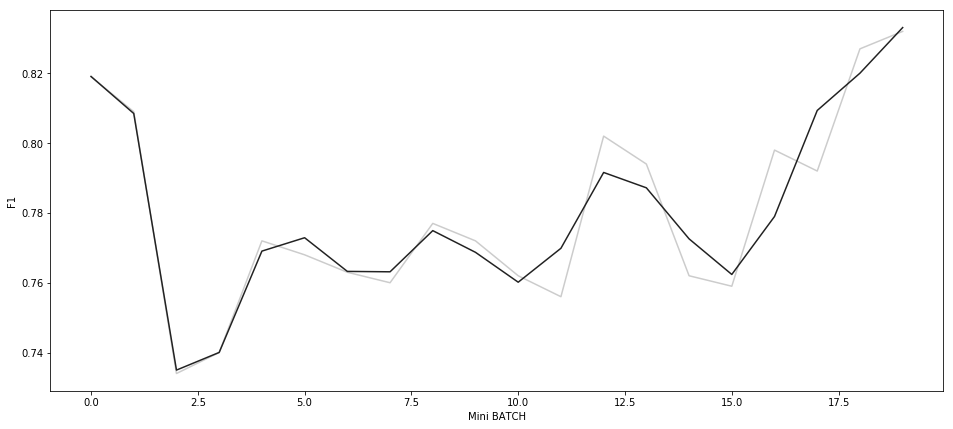

In [25]:
f1hat = savgol_filter(test['F1'], 11, 7)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_test,test['F1'], color='#cccccc')
plt.plot(T_test,f1hat, color='#222222')
labels = ax.get_xticks()
plt.xlabel('Mini BATCH')
plt.ylabel('F1')
plt.show()

### TEST precision-recall

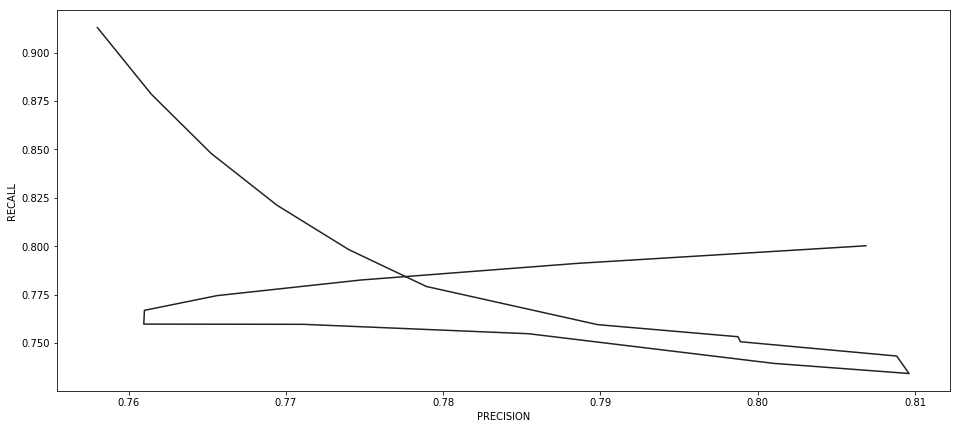

In [26]:
plt.rcParams["figure.figsize"] = [16,7]
prec_hat=savgol_filter(test['PRECISION'],11, 2)
rec_hat=savgol_filter(test['RECALL'], 11, 2)
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.plot(prec_hat, rec_hat, color='#222222')
# plt.plot(T_val,rec_hat, color='Blue')
plt.show()

### Test Accuracy

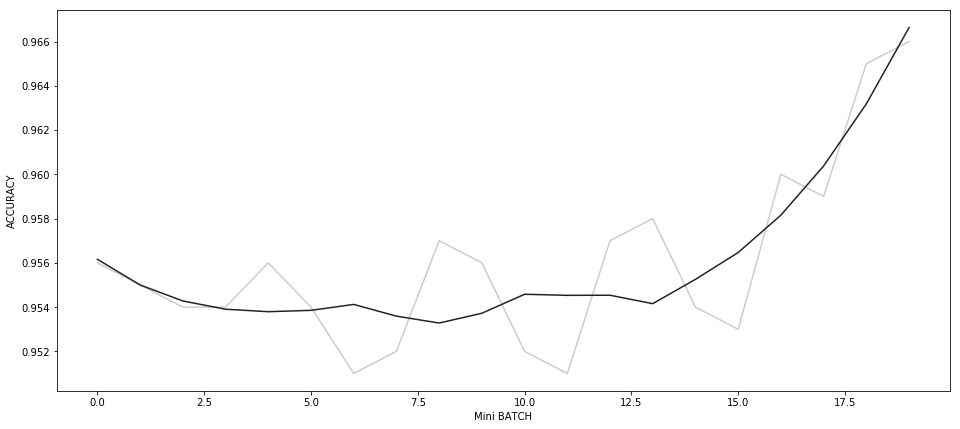

In [27]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(test['ACCURACY'], 11, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_test,test['ACCURACY'], color='#cccccc')
plt.plot(T_test,f1hat, color='#222222')
labels = ax.get_xticks()
plt.xlabel('Mini BATCH')
plt.ylabel('ACCURACY')
plt.show()